In [4]:
import pandas as pd
import numpy as np
import glob

In [14]:
files = glob.glob('/home/shared/Data/encode/mouse/enhancer/replicated/*chromHMM.bed.gz')

In [16]:
tissues = []
for f in files:
    name = f.split('/')[-1].split('_')[0]
    tissues.append(name)
print(len(set(tissues)))

12


In [23]:
enh_df = pd.DataFrame()

In [24]:
if enh_df.shape == (0,0):
    print('yes')

yes


In [53]:
for file in files:
    df = pd.read_csv(file,sep='\t',header=None)
    if enh_df.shape == (0,0):
        enh_df = df[df[3].isin(['U5','U6','U7'])]
        enh_df.reset_index(drop=True,inplace=True)
    else:
        enh = df[df[3].isin(['U5','U6','U7'])]
        enh.reset_index(drop=True,inplace=True)
        enh_df = enh_df.append(enh)
        enh_df.reset_index(drop=True,inplace=True)
        

In [56]:
enh_df.to_csv('enh_mouse.bed',header=None,columns=None,sep='\t',index=None)

In [57]:
import os

In [ ]:
os.system('bedtools sort -i enh_mouse.bed >enh_mouse_sort.bed')
os.system('bedtools merge -i enh_mouse_sort.bed >enh_mouse_sort_merge.bed')

In [17]:
enh = pd.read_csv('enh_mouse_sort_merge.bed',sep='\t',header=None)

### enh distribution

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
enh.shape

(135322, 3)

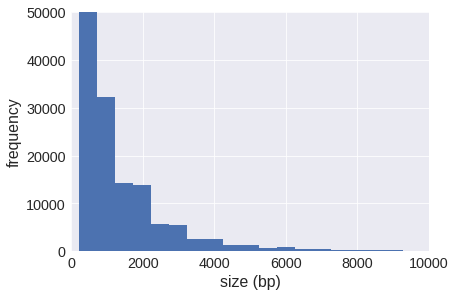

In [19]:
plt.hist(enh[2]-enh[1],bins=100)
plt.xlim([0,10000])
plt.ylim([0,50000])
plt.xlabel('size (bp)')
plt.ylabel('frequency')

### filter overlapping protein coding genes

In [66]:
pc_g = pd.read_csv('/home/shared/Data/gencode/mouse/mm10/protein_coding.gtf',sep='\t',header=None)

In [73]:
annot = []
for row in pc_g.iterrows():
    r = row[1]
    if r[6] == '-':
        start = r[4]-2500
        stop = r[4]+2500
    else:
        start = r[3]-2500
        stop = r[3]+2500
    annot.append((r[0],start,stop))

In [75]:
pc_g_tss = pd.DataFrame(annot)

In [76]:
pc_g_tss.to_csv('mm10_pc_tss.bed',header=None,index=None,sep='\t')

In [ ]:
os.system('bedtools subtract -a enh_mouse_sort_merge.bed -b mm10_pc_tss.bed -A > enh_mouse_pc_tss_subtracted.bed')

In [10]:
enh = pd.read_csv('enh_mouse_pc_tss_subtracted.bed',header=None,sep='\t')

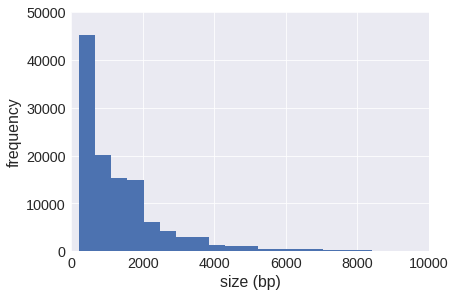

In [12]:
plt.hist(enh[2]-enh[1],bins=100)
plt.xlim([0,10000])
plt.ylim([0,50000])
plt.xlabel('size (bp)')
plt.ylabel('frequency')


In [97]:
enh.shape

(118936, 3)

In [98]:
peaks = pd.read_csv('/home/shared/Data/encode/mouse/ChIP/H3K27ac_rep_peaks/all_peaks_sort_merge.bed',sep='\t',header=None)

In [ ]:
plt.hist(peaks[2]-peaks[1],bins=100)
plt.xlim([0,10000])

### Position enh to H3K27ac peaks

In [5]:

enh_peaks = pd.read_csv('/home/vamin/projects/epee/peak_overlapped_pc_tss_subtracted_enh_mouse_pc_tss_subtracted.bed',sep='\t',header=None)

In [21]:
enh_peaks.shape

(131483, 3)

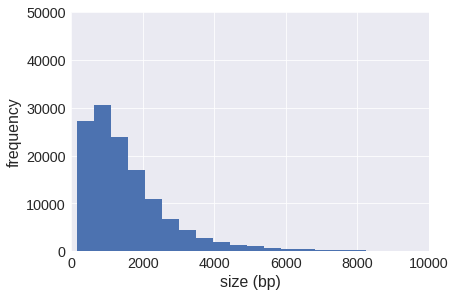

In [13]:
import seaborn as sb
sb.set_context('paper',font_scale=1.8)
plt.hist(enh_peaks[2]-enh_peaks[1],bins=100)
plt.xlim([0,10000])
plt.ylim([0,50000])
plt.xlabel('size (bp)')
plt.ylabel('frequency')

In [1]:
enh_peaks

NameError: name 'enh_peaks' is not defined

In [54]:
temp = bt.BedTool.sort('temp.bed')

(1259455, 4)

In [25]:
enh = df[df[3].isin(['U5','U6','U7'])]

In [29]:
enh.reset_index(drop=True,inplace=True)

In [31]:
enh_df.reset_index(drop=True,inplace=True)

In [33]:
m_df = enh_df.append(enh)

In [34]:
m_df.reset_index(drop=True,inplace=True)

In [36]:
del(m_df[3])

In [41]:
m_df.to_csv('temp.bed',columns=None,sep='\t',index=None)

In [42]:
import pybedtools.bedtool as bt

In [45]:
temp = bt.BedTool.sort('temp.bed')

AttributeError: 'str' object has no attribute '_isbam'

In [48]:
enh_m = pd.read_csv('temp_sort_merge.bed',sep='\t')

(array([  5.59000000e+03,   0.00000000e+00,   4.60500000e+03,
          0.00000000e+00,   3.06700000e+03,   0.00000000e+00,
          2.19200000e+03,   0.00000000e+00,   1.57400000e+03,
          0.00000000e+00,   1.17600000e+03,   0.00000000e+00,
          0.00000000e+00,   7.42000000e+02,   0.00000000e+00,
          5.47000000e+02,   0.00000000e+00,   3.74000000e+02,
          0.00000000e+00,   2.56000000e+02,   0.00000000e+00,
          2.34000000e+02,   0.00000000e+00,   1.32000000e+02,
          0.00000000e+00,   0.00000000e+00,   1.11000000e+02,
          0.00000000e+00,   6.80000000e+01,   0.00000000e+00,
          4.30000000e+01,   0.00000000e+00,   4.20000000e+01,
          0.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.50000000e+01,   0.00000000e+00,   0.00000000e+00,
          2.40000000e+01,   0.00000000e+00,   1.30000000e+01,
          0.00000000e+00,   1.20000000e+01,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   4.00000000e+00,
        

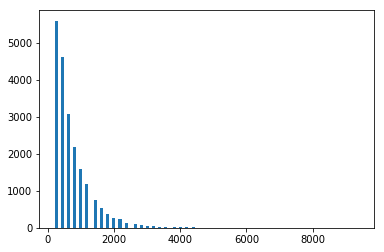

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(enh_m['2']-enh_m['1'],bins=100)